In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [19]:
df = pd.read_csv("HousingData.csv")

In [20]:
for column in df.columns:
    if df[column].isnull().any():
        df[column] = df[column].fillna(df[column].median())

X = df.drop("MEDV", axis=1)
y = df["MEDV"]


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("🔹 Linear Regression:")
print(f"   MSE: {lr_mse:.2f}")
print(f"   R² Score: {lr_r2:.2f}")

print("\n🔹 Random Forest Regressor:")
print(f"   MSE: {rf_mse:.2f}")
print(f"   R² Score: {rf_r2:.2f}")

🔹 Linear Regression:
   MSE: 25.00
   R² Score: 0.66

🔹 Random Forest Regressor:
   MSE: 8.22
   R² Score: 0.89


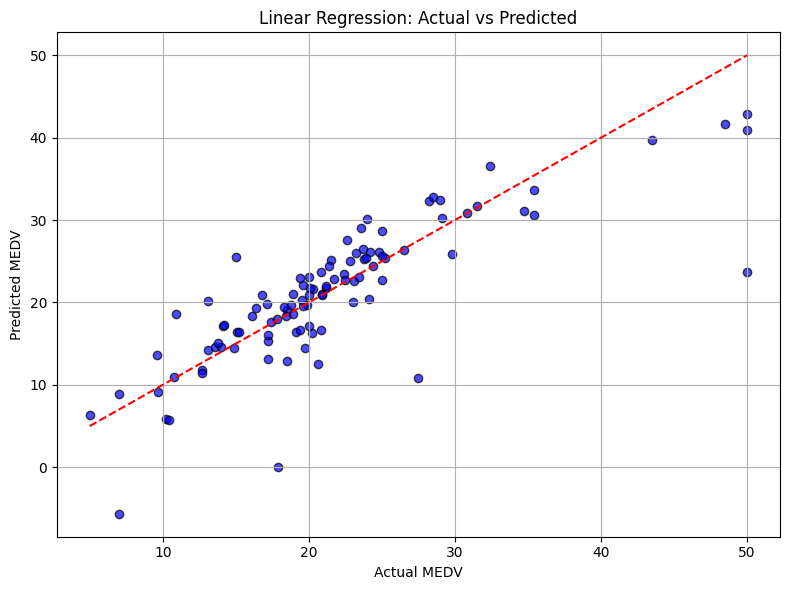

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_pred, alpha=0.7, color="blue", edgecolors="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()


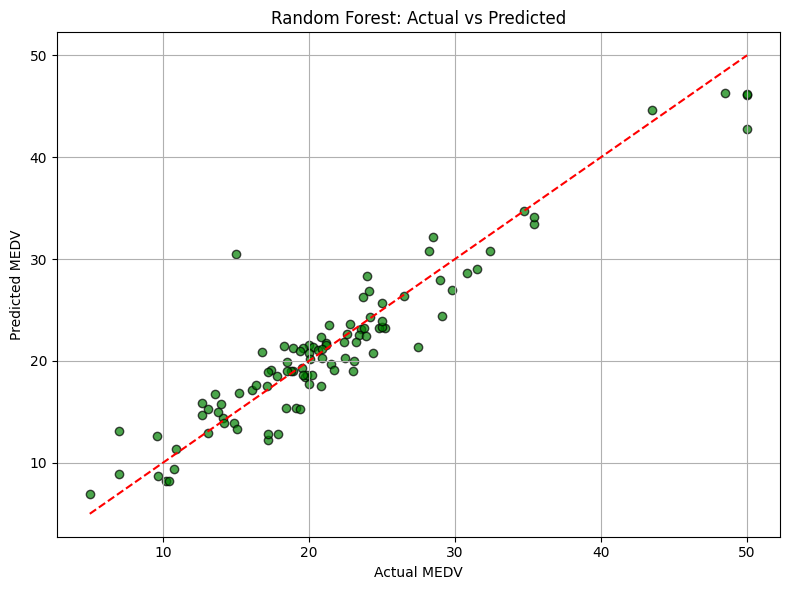

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_pred, alpha=0.7, color="green", edgecolors="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Random Forest: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by="Importance", ascending=False)

print("\n📊 Feature Importances:")
print(feature_importance_df)

joblib.dump(lr_model, "linear_regression_model.pkl")
joblib.dump(rf_model, "random_forest_model.pkl")
df.to_csv("Cleaned_HousingData.csv", index=False)

print("\n✅ Models and dataset saved successfully.")


📊 Feature Importances:
    Feature  Importance
5        RM    0.560640
12    LSTAT    0.243393
7       DIS    0.060263
0      CRIM    0.043646
10  PTRATIO    0.018016
9       TAX    0.016965
4       NOX    0.016219
6       AGE    0.013350
11        B    0.013335
2     INDUS    0.006537
8       RAD    0.004731
1        ZN    0.001730
3      CHAS    0.001176

✅ Models and dataset saved successfully.
